In [92]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drugs = "data/mouse_drug_data.csv"
clinical_trials = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
md_df = pd.read_csv(mouse_drugs)
ct_df = pd.read_csv(clinical_trials)

# Combine the data into a single dataset
df = pd.merge(md_df, ct_df, how='outer', on='Mouse ID')

df = df[df['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]
# Display the data table for preview
df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [93]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
TR_df = pd.DataFrame({
    'Drug': df['Drug'],
    'Timepoint': df['Timepoint'],
    'Volume': df['Tumor Volume (mm3)']
})
TRgroup_df = TR_df.groupby(('Drug', 'Timepoint'), as_index=False)
TR_mean_df = TRgroup_df.mean()
TR_mean_df.head()
# Convert to DataFrame
# Preview DataFrame


,Drug,Timepoint,Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [94]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
TR_SE_df = TR_df.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame
TR_SE_df = pd.DataFrame(TR_SE_df.reset_index())
# Preview DataFrame
TR_SE_df.head()


,Drug,Timepoint,Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [95]:
# Minor Data Munging to Re-Format the Data Frames
Drug_mean_df = TR_mean_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Volume')
Drug_SE_df = TR_SE_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Volume')
# # Preview that Reformatting worked
Drug_mean_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [96]:
Drug_SE_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


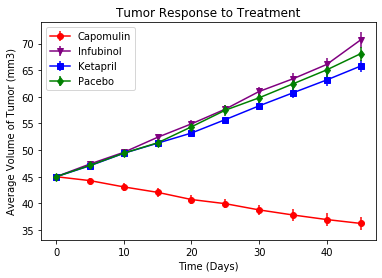

In [97]:
# Generate the Plot (with Error Bars)
# Capomulin	Ceftamin	Infubinol	Ketapril	Naftisol	Placebo	Propriva	Ramicane	Stelasyn	Zoniferol
Drugs = Drug_mean_df.keys()
Timepoint = Drug_mean_df.index

Capo_mean = Drug_mean_df.loc[:, ['Capomulin']]
Capo_mean = Capo_mean['Capomulin']
Capo_SE = Drug_SE_df.loc[:, ['Capomulin']]
Capo_SE = Capo_SE['Capomulin']

Infu_mean = Drug_mean_df.loc[:, ['Infubinol']]
Infu_mean = Infu_mean['Infubinol']
Infu_SE = Drug_SE_df.loc[:, ['Infubinol']]
Infu_SE = Infu_SE['Infubinol']

Keta_mean = Drug_mean_df.loc[:, ['Ketapril']]
Keta_mean = Keta_mean['Ketapril']
Keta_SE = Drug_SE_df.loc[:, ['Ketapril']]
Keta_SE = Keta_SE['Ketapril']

Plac_mean = Drug_mean_df.loc[:, ['Placebo']]
Plac_mean = Plac_mean['Placebo']
Plac_SE = Drug_SE_df.loc[:, ['Placebo']]
Plac_SE = Plac_SE['Placebo']

plt.xlabel("Time (Days)")
plt.ylabel("Average Volume of Tumor (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid=True

plt.errorbar(Timepoint, Capo_mean, Capo_SE, marker ='o',  color="red", label="Capomulin")
plt.errorbar(Timepoint, Keta_mean, Keta_SE, marker ='v', color="purple", label="Ketapril")
plt.errorbar(Timepoint, Infu_mean, Infu_SE, marker ='s', color="blue", label="Infubinol")
plt.errorbar(Timepoint, Plac_mean, Plac_SE, marker = 'd', color="green", label="Placebo")
plt.legend(labels=Drug_Names, loc="best")

# Save the Figure
plt.show()



## Metastatic Response to Treatment

In [98]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
MS_df = pd.DataFrame({
    'Drug': df['Drug'],
    'Timepoint': df['Timepoint'],
    'Metastatic Sites': df['Metastatic Sites']
})
MSgroup_df = MS_df.groupby(('Drug', 'Timepoint'), as_index=False)
MS_mean_df = MSgroup_df.mean()
MS_mean_df.head()
# Convert to DataFrame

# Preview DataFrame


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [99]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
MS_SE_df = MS_df.groupby(['Drug', 'Timepoint']).sem()
# Convert to DataFrame
MS_SE_df = pd.DataFrame(MS_SE_df.reset_index())
# Preview DataFrame
MS_SE_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [100]:
# Minor Data Munging to Re-Format the Data Frames
MS_mean_df = MS_mean_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
MS_SE_df = MS_SE_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# # Preview that Reformatting worked
MS_mean_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [101]:
MS_SE_df.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064


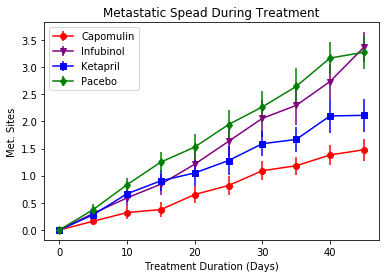

In [129]:
# Generate the Plot (with Error Bars)
Capo_mean = MS_mean_df.loc[:, ['Capomulin']]
Capo_mean = Capo_mean['Capomulin']
Capo_SE = MS_SE_df.loc[:, ['Capomulin']]
Capo_SE = Capo_SE['Capomulin']

Infu_mean = MS_mean_df.loc[:, ['Infubinol']]
Infu_mean = Infu_mean['Infubinol']
Infu_SE = MS_SE_df.loc[:, ['Infubinol']]
Infu_SE = Infu_SE['Infubinol']

Keta_mean = MS_mean_df.loc[:, ['Ketapril']]
Keta_mean = Keta_mean['Ketapril']
Keta_SE = MS_SE_df.loc[:, ['Ketapril']]
Keta_SE = Keta_SE['Ketapril']

Plac_mean = MS_mean_df.loc[:, ['Placebo']]
Plac_mean = Plac_mean['Placebo']
Plac_SE = MS_SE_df.loc[:, ['Placebo']]
Plac_SE = Plac_SE['Placebo']
# Save the Figure

# Show the Figure
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spead During Treatment")
plt.grid=True

plt.errorbar(Timepoint, Capo_mean, Capo_SE, marker ='o',  color="red", label="Capomulin")
plt.errorbar(Timepoint, Keta_mean, Keta_SE, marker ='v', color="purple", label="Ceftamin")
plt.errorbar(Timepoint, Infu_mean, Infu_SE, marker ='s', color="blue", label="Infubinol")
plt.errorbar(Timepoint, Plac_mean, Plac_SE, marker = 'd', color="green", label="Placebo")
plt.legend(labels=Drug_Names, loc="best")

plt.savefig("../Images/MetaSpread_NG.png")
plt.show()

## Survival Rates

In [103]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
Mice_df = pd.DataFrame({
    'Drug': df['Drug'],
    'Timepoint': df['Timepoint'],
    'Mouse ID': df['Mouse ID']
})
Micegroup_df = Mice_df.groupby(('Drug', 'Timepoint'), as_index=False)
Mice_count_df = Micegroup_df.count()
Mice_count_df['Survival Rate'] = ((Mice_count_df['Mouse ID']/25) * 100)
# Convert to DataFrame

# Preview DataFrame
Mice_count_df.head()

,Drug,Timepoint,Mouse ID,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


In [104]:
# Minor Data Munging to Re-Format the Data Frames
Mice_df = Mice_count_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Survival Rate')
# Preview the Data Frame
Mice_df

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


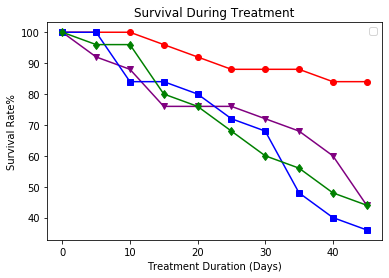

In [131]:
# Generate the Plot (Accounting for percentages)
Capo_SR = Mice_df.loc[:, ['Capomulin']]
Capo_SR = Capo_SR['Capomulin']

Infu_SR = Mice_df.loc[:, ['Infubinol']]
Infu_SR = Infu_SR['Infubinol']

Keta_SR = Mice_df.loc[:, ['Ketapril']]
Keta_SR = Keta_SR['Ketapril']

Plac_SR = Mice_df.loc[:, ['Placebo']]
Plac_SR = Plac_SR['Placebo']

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate%")
plt.title("Survival During Treatment")
plt.grid=True
plt.legend(labels=Drug_Names, loc="best")

plt.plot(Timepoint, Capo_SR, marker ='o',  color="red", label="Capomulin")
plt.plot(Timepoint, Keta_SR, marker ='v', color="purple", label="Ceftamin")
plt.plot(Timepoint, Infu_SR, marker ='s', color="blue", label="Infubinol")
plt.plot(Timepoint, Plac_SR, marker = 'd', color="green", label="Placebo")
# Save the Figure
plt.savefig("../Images/Survival_NG.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [106]:
Mice_change_df = Drug_mean_df.iloc[[0, -1]]
Mice_vol_pc = Mice_change_df.pct_change().dropna()
Mice_vol_pc

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
45,-0.194753,0.461235,0.570288,0.51298


In [107]:
def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()
        
        # Just print the percentage in the center of the bar
        label_position = height/2

        ax.text(rect.get_x() + rect.get_width()/2., label_position,str('%d' % int(height)) + '%',
                ha='center', va='bottom', color = 'w', size = 14)

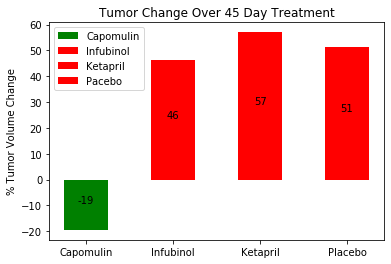

In [132]:
# Store all Relevant Percent Changes into a Tuple
Capo_tup = tuple(Mice_vol_pc["Capomulin"])
Capo_tup = Capo_tup[0] * 100
Infu_tup = tuple(Mice_vol_pc["Infubinol"])
Infu_tup = Infu_tup[0] * 100
Keta_tup = tuple(Mice_vol_pc["Ketapril"])
Keta_tup = Keta_tup[0] * 100
Plac_tup = tuple(Mice_vol_pc["Placebo"])
Plac_tup = Plac_tup[0] * 100
Drug_vols = [Capo_tup, Infu_tup, Keta_tup, Plac_tup]
Drug_list = Mice_vol_pc.columns.values

# Splice the data between passing and failing drugs
x_axis = np.arange(len(Drug_list))
x = 0

def autolabel(drugs):
    for drug in drugs:
        height = drug.get_height()
        plt.text(drug.get_x() + drug.get_width()/2., .5*height,
                '%d' % int(height),
                ha='center', va='bottom')
        
while x < len(Drug_list):
    if Drug_vols[x] > 0:
        bar_x = plt.bar(x_axis[x], Drug_vols[x], 0.5, color="r", zorder=3)
        x = x + 1
        autolabel(bar_x)
    else:
        bar_x = plt.bar(x_axis[x], Drug_vols[x], 0.5, color="g", zorder=3)
        x = x + 1
        autolabel(bar_x)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_list)
plt.legend(labels=Drug_Names, loc="best")


# # Save the Figure
plt.savefig("../Images/TumorChange_NG.png")

# # Show the Figure
plt.show()